In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=150)
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

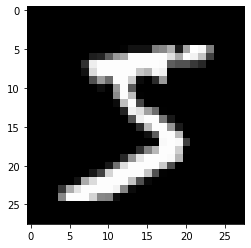

In [18]:
print(y_train[0])
print(x_train[0])

plt.gray()
plt.imshow(x_train[0])

In [19]:
images_train = x_train.reshape([-1,784]) / 255.0
images_test = x_test.reshape([-1,784]) / 255.0

with tf.Session() as sess:
  labels_train = sess.run(tf.one_hot(y_train, depth=10))
  labels_test = sess.run(tf.one_hot(y_test, depth=10))
    
print(labels_train[0])

print(images_train.shape)
print(images_test.shape)
print(labels_train.shape)
print(labels_test.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [20]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
T = tf.placeholder(dtype=tf.float32, shape=[None, 10])

image = tf.reshape(X, shape=[-1,28,28,1])
conv1 = tf.layers.conv2d(image, filters=2, kernel_size=(3,3), padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2))
conv2 = tf.layers.conv2d(pool1, filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2))
flat = tf.layers.flatten(pool2)
logits = tf.layers.dense(flat, 10)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=T)

train_step = tf.train.GradientDescentOptimizer(learning_rate=0.0005).minimize(loss)

probabilities = tf.nn.softmax(logits)
pred_class = tf.argmax(probabilities, axis=1)
target_class = tf.argmax(T, axis=1)
correct_preds = tf.equal(pred_class, target_class)
accuracy_op = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [21]:
batch_size = 250

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  iterations = 10
  for i in range(iterations):
    
    for b in range(0, len(images_train), batch_size):
      images_batch = images_train[b : b+batch_size]
      labels_batch = labels_train[b : b+batch_size]
      sess.run(train_step, feed_dict={X: images_batch, T: labels_batch})
    
    accuracy = sess.run(accuracy_op, feed_dict={X: images_test, T: labels_test})
    print("Iteration: {0}, accuracy: {1:.2f}".format(i, accuracy))

Iteration: 0, accuracy: 0.93
Iteration: 1, accuracy: 0.96
Iteration: 2, accuracy: 0.97
Iteration: 3, accuracy: 0.97
Iteration: 4, accuracy: 0.98
Iteration: 5, accuracy: 0.98
Iteration: 6, accuracy: 0.98


KeyboardInterrupt: 